# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry (AuxTel)

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : January 14th 2017
- update : Jun  6 th 2018


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel to obtained a


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [381]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [382]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Output filename and desired wavelength

In [383]:
root_filename="Beam4_Rayfile_"

In [384]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y

In [385]:
Wavelength=0.4
WL=int(1000.*Wavelength)

In [386]:
theta_x=0.045*60.  # targent offset
theta_y=0 # angle in arcmin 

In [387]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [388]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_{:d}nm_{:d}_{:d}.xlsx".format(NBEAM,WL,theta_x_num,theta_y_num)

In [389]:
Beam4_Rayfile

'Beam4_Rayfile_121_400nm_26_0.xlsx'

## Constants for conversions

In [390]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [391]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcsec_to_arcmin=1./arcmin_to_arcsec
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [392]:
deg_to_rad=np.pi/180.
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin
arcsec_to_rad=1./rad_to_arcsec

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [393]:
Tel_Focal_Length=21.6 # m : Focal length of the telescope
Tel_Diameter=1.2 # m : Diameter of the telescope    

In [394]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

In [395]:
print "Aperture/D =  {} ".format(Tel_Fnum)

Aperture/D =  18.0 


In [396]:
alpha=Tel_Diameter/2./Tel_Focal_Length

In [397]:
print "Beam half angle alpha= {} degree".format(alpha*rad_to_deg)

Beam half angle alpha= 1.59154943092 degree


#### Filter

In [398]:
Filt_D=0.265 # m distance of the rotator plane wrt CCD plane
Filt_size=3*inch_to_mm

In [399]:
Filt_size

76.19999999999999

#### Hologram

In [400]:
Holo_D=-0.190 # m distance to the CCD plane

#### CCD Detector

In [401]:
Det_xpic=10.0 # microns per pixel
Det_NbPix=4096 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inches

In [402]:
print 'Detecteur size = {} mm'.format(Det_size)

Detecteur size = 40.96 mm


In [403]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [404]:
Det_pix_angl*rad_to_arcsec

0.0954929658551372

In [405]:
print "pixel viewing angle = {} arcsec ".format(Det_pix_angl*rad_to_arcsec)

pixel viewing angle = 0.0954929658551 arcsec 


In [406]:
fov =Det_pix_angl*Det_NbPix*rad_to_arcmin

In [407]:
print 'Full FOV = {} arcmin'.format(fov)

Full FOV = 6.51898646904 arcmin


## Location of the source in the field of view

The Field of view of the telescope is +/- 30 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [408]:
theta_fov_max=30.
theta_fov_min=-30.

### Off axis angle in radian

In [409]:
theta_x=theta_x*arcmin_to_rad
theta_y=theta_y*arcmin_to_rad

In [410]:
print 'theta_x = {} rad '.format(theta_x)
print 'theta_y = {} rad '.format(theta_y)

theta_x = 0.000785398163397 rad 
theta_y = 0.0 rad 


### Angles of upper (1) and lower (2) rays

In [411]:
tan_beta1_x=np.tan(alpha)+np.tan(theta_x)
tan_beta2_x=np.tan(alpha)-np.tan(theta_x)

In [412]:
print 'beta1_x = {} rad '.format(tan_beta1_x)
print 'beta2_x = {} rad '.format(tan_beta2_x)

beta1_x = 0.0285703227986 rad 
beta2_x = 0.0269995261488 rad 


In [413]:
tan_beta1_y=np.tan(alpha)+np.tan(theta_y)
tan_beta2_y=np.tan(alpha)-np.tan(theta_y)

In [414]:
beta1_x=np.arctan(tan_beta1_x)
beta2_x=np.arctan(tan_beta2_x)
beta1_y=np.arctan(tan_beta1_y)
beta2_y=np.arctan(tan_beta2_y)

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective converging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

### Z coordinate where the beam start

- the Z origin is that of Focal Point

In [415]:
Z00=-Filt_D*m_to_mm  # distance between plane where the trcking beam start. Origin in Z at FP

### (X,Y) coordinate of Focal point at Z origin

In [416]:
X0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_x)
Y0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_y)

### (X,Y) coordinate of central ray where the beam tracking start

In [417]:
X00=X0P-Z00*np.sin(theta_x)  # central beam
Y00=Y0P-Z00*np.sin(theta_y)  # central beam

### X-up, X-down position where the beam start

In [418]:
X01=X0P-Z00*np.sin(beta1_x)
X02=X0P+Z00*np.sin(beta2_x)

In [419]:
print "X01= {} mm , X00 = {} mm , X02= {} mm".format( X01, X00, X02)

X01= -9.39655640575 mm , X00 = -16.7564733257 mm , X02= -24.1168718118 mm


In [420]:
Y01=Y0P-Z00*np.sin(beta1_y)
Y02=Y0P+Z00*np.sin(beta2_y)

In [421]:
print "Y01= {} mm , Y00 = {} mm , Y02= {} mm".format( Y01, Y00, Y02)

Y01= 7.36016450268 mm , Y00 = 0.0 mm , Y02= -7.36016450268 mm


In [422]:
XMIN=X02
XMAX=X01

In [423]:
YMIN=Y02
YMAX=Y01

# Number of points

In [424]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

In [425]:
XX0=XX
YY0=YY

In [426]:
pts = itertools.product(X, Y)

Text(0,0.5,'Y')

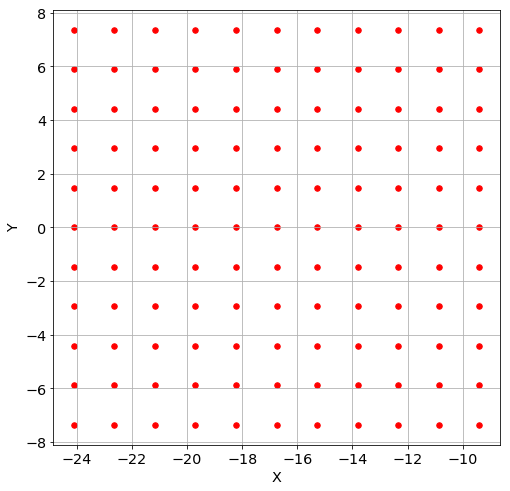

In [427]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')
plt.xlabel("X")
plt.ylabel("Y")

Text(0.5,1,'Impact points at telescope aperture')

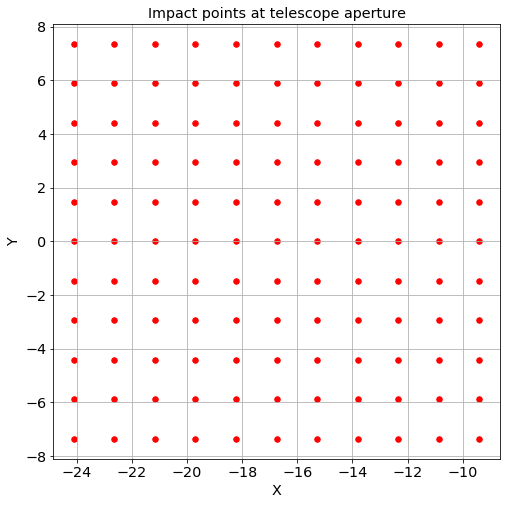

In [428]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Impact points at telescope aperture")

In [429]:
def GetCosinusDirector(X,Y,Z,X0,Y0):
    """
    The size of X,Y is the number of Rays
    """
    
    DeltaX=X0-X
    DeltaY=Y0-Y
    DeltaZ=-Z
    
    
    Norm=np.sqrt( np.power(DeltaX,2) + np.power(DeltaY,2)+ DeltaZ**2)
    UX=DeltaX/Norm
    UY=DeltaY/Norm
    UZ=DeltaZ/Norm
    return UX,UY,UZ    

In [430]:
UX,UY,UZ=GetCosinusDirector(XX0,YY0,Z00,X0P,Y0P)

Text(0.5,1,'Vector field')

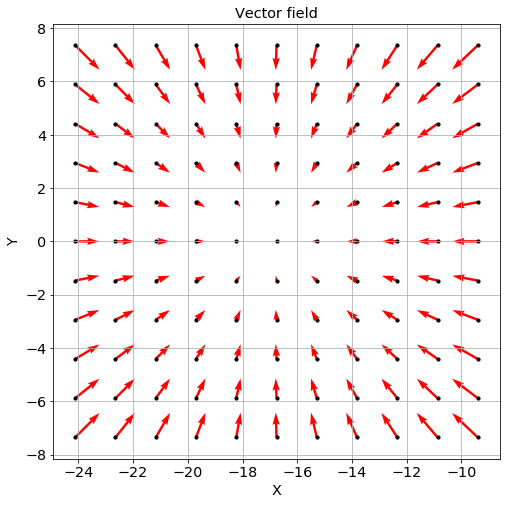

In [431]:
plt.grid()
q = plt.quiver(XX0,YY0,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX0,YY0, marker='o', s=10, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector field")

In [432]:
def GetPointPosition(X,Y,DeltaZ,UX,UY,UZ):
    k=DeltaZ/UZ
    theX0=X+k*UX
    theY0=Y+k*UY
    return theX0,theY0

In [433]:
Z1=-Holo_D*m_to_mm  # distance between p

In [434]:
DeltaZ=Z1-Z00

In [435]:
(X1,Y1)=GetPointPosition(XX0,YY0,DeltaZ,UX,UY,UZ)

Text(0.5,1,'Beam Impact point at the Hologram')

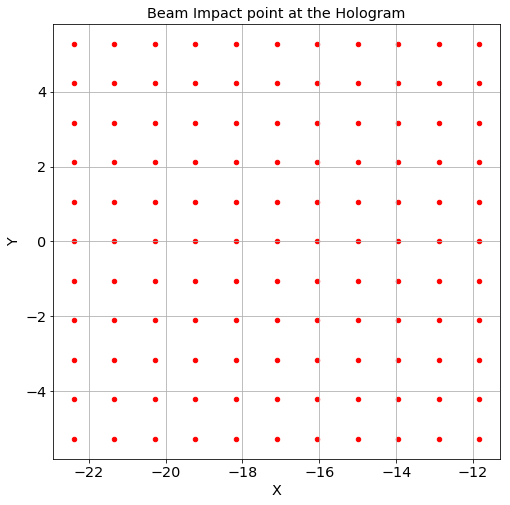

In [436]:
plt.scatter(X1,Y1, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Beam Impact point at the Hologram")

## Create Dataframe

In [437]:
df = pd.DataFrame()

In [438]:
Xout=XX0.flatten()
Yout=YY0.flatten()

In [439]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [440]:
Zout=np.zeros(NBEAM)+Z00

Text(0.5,0,'Z')

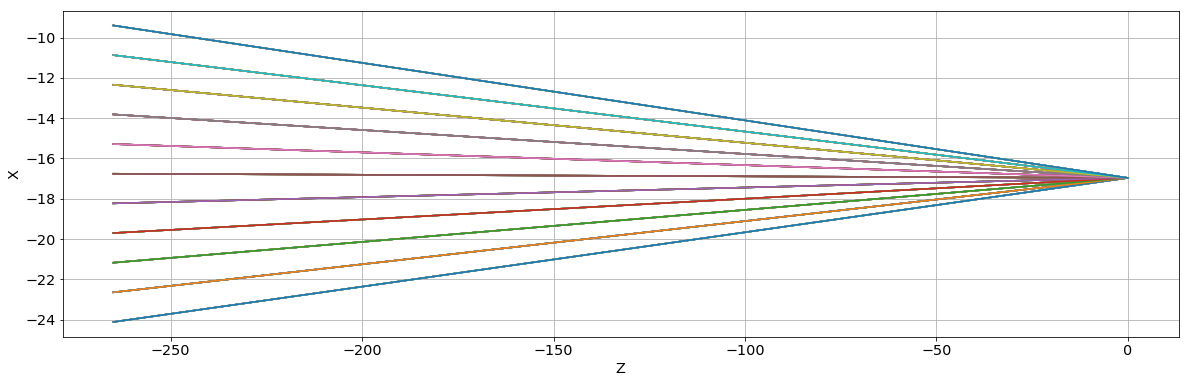

In [441]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Xfinal=Xout[idx]-Zout[idx]*Uout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Xout[idx],Xfinal])
plt.grid()
plt.ylabel("X")
plt.xlabel("Z")

Text(0.5,0,'Z')

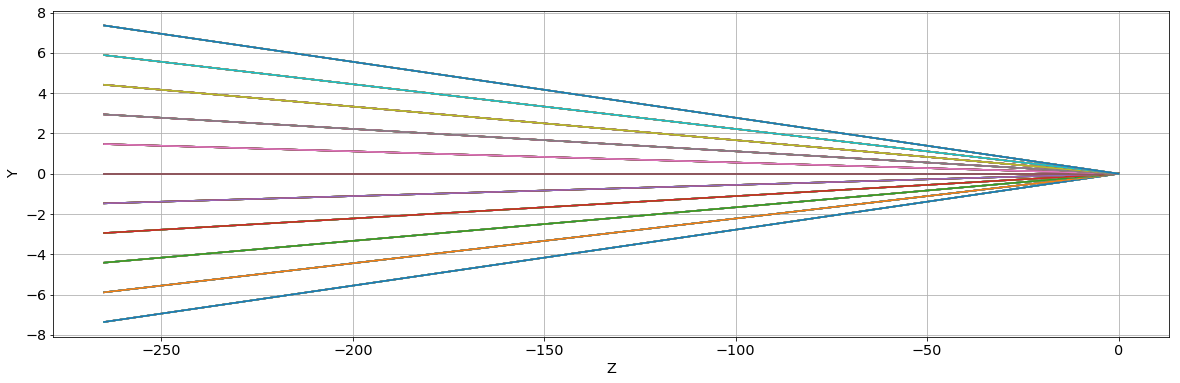

In [442]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Yfinal=Yout[idx]-Zout[idx]*Vout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Yout[idx],Yfinal])
plt.grid()
plt.ylabel("Y")
plt.xlabel("Z")

In [443]:
Wave=Wavelength*np.ones(NBEAM)

In [444]:
df["X0"]=Xout
df["Y0"]=Yout
df["Z0"]=Zout
df["U0"]=Uout
df["V0"]=Vout
df["W0"]=Wout
df["wave"]=Wave

In [445]:
df

,X0,Y0,Z0,U0,V0,W0,wave
0,-24.116872,-7.360165,-265.0,0.026969,0.027753,0.999251,0.4
1,-22.644840,-7.360165,-265.0,0.021422,0.027757,0.999385,0.4
2,-21.172809,-7.360165,-265.0,0.015872,0.027760,0.999489,0.4
3,-19.700777,-7.360165,-265.0,0.010321,0.027762,0.999561,0.4
4,-18.228746,-7.360165,-265.0,0.004768,0.027763,0.999603,0.4
5,-16.756714,-7.360165,-265.0,-0.000784,0.027763,0.999614,0.4
6,-15.284683,-7.360165,-265.0,-0.006337,0.027763,0.999594,0.4
7,-13.812651,-7.360165,-265.0,-0.011889,0.027762,0.999544,0.4
8,-12.340619,-7.360165,-265.0,-0.017440,0.027759,0.999462,0.4
9,-10.868588,-7.360165,-265.0,-0.022989,0.027756,0.999350,0.4


In [446]:
df.to_excel(Beam4_Rayfile)